# Problem Statement: 
Hierarchical Clustering using Agglomerative Algorithm 

# Data Description: 
We have a dataset consist of 200 mall customers data. The data frame includes the customerID, genre, age, annual income and spending score of each customer. Spending score is a score that the amount computed for each of their clients based on several criteria including, for instance, their income, the number of times per week they come to the mall and the money they spent in a year. This score is between 1–100.

# Procedure:
1. Initially, each item is considered a set by itself.
2. A similarity or distance matrix is created between all items. This matrix shows the distance or similarity between     each pair of items.
3. The closest two clusters (or elements) are found and a new cluster is formed by combining these two clusters.
4. Step 3 is repeated until only one cluster remains in the dataset. This process creates a clustering structure in which items are grouped into a hierarchical tree structure.

# Code :

## import the library

In [14]:
from sklearn.cluster import AgglomerativeClustering
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

### Importing the Dataset

In [15]:
data = pd.read_csv('Mall_Customers2.csv')
#f1 = data['Age'].values
f2 = data['Annual Income (k$)'].values
f3 = data['Spending Score (1-100)'].values
X = numpy.array(list(zip(f2, f3)))


In [34]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
cluster_labels = hc.fit_predict(X)
#print(cluster_labels)

C:\Users\Win10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [17]:
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise_ = list(cluster_labels).count(-1)

print("Estimated number of clusters: " , n_clusters_)
print("Estimated number of noise points: " , n_noise_)

Estimated number of clusters:  3
Estimated number of noise points:  0


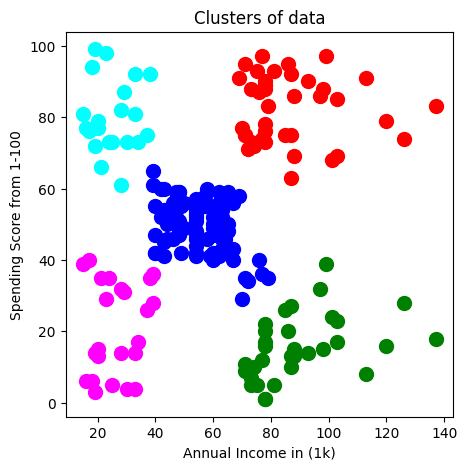

Quality of Clustering:  0.5529945955148896


In [36]:
plt.figure(figsize=(5,5))
plt.scatter(X[cluster_labels==0, 0], X[cluster_labels==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[cluster_labels==1, 0], X[cluster_labels==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[cluster_labels==2, 0], X[cluster_labels==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[cluster_labels==3, 0], X[cluster_labels==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[cluster_labels==4, 0], X[cluster_labels==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()
if(n_clusters_ > 1):
  sil = silhouette_score(X, cluster_labels,
                         metric='euclidean',
                         sample_size = len(data))
  print("Quality of Clustering: ", sil)

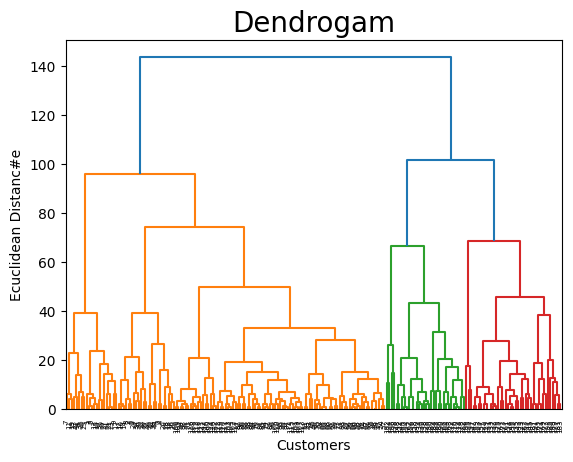

In [38]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distanc#e')
plt.show()

# Remark:
In this application, we examined the basic concepts of hierarchical clustering and examined its application using Python. Hierarchical clustering is a powerful unsupervised learning technique that allows us to identify natural groupings in our data without the need for labeled examples.
However, it is important to note that hierarchical clustering may not always be the best option for every dataset. Depending on the size and dimensionality of the data and the particular problem at hand, other clustering algorithms such as K-means or DBSCAN may yield better results.